In [159]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [160]:
# path = r'./input/result_40.xlsx'
path = r'./input/result.xlsx'
data = pd.read_excel(path)
data

,Noisiness,ESL,PSL,ASL,ESL-SL,SL-ASL,PSL-SL
0,7.14,56.675,54.324500,63.98500,-3.295,-4.015000,-5.645500
1,6.24,54.500,51.408125,65.34500,-2.840,-8.005000,-5.931875
2,5.64,56.775,55.338875,63.28013,-3.045,-3.460125,-4.481125
3,5.26,56.000,54.996500,64.01250,-3.380,-4.632500,-4.383500
4,5.04,56.500,54.932500,63.44000,-3.160,-3.780000,-4.727500
5,4.69,57.850,55.478875,63.06750,-2.120,-3.097500,-4.491125
6,4.20,57.225,55.537000,63.54500,-2.745,-3.575000,-4.433000
7,4.18,57.625,57.130875,62.23250,-2.055,-2.552500,-2.549125
8,3.89,60.900,57.062750,60.66250,1.720,-1.482500,-2.117250
9,3.67,60.600,58.467750,58.71000,1.920,-0.030000,-0.212250


In [161]:
x_data = np.array(data['Noisiness'])
# name = 'ESL-SL'
name = 'SL-ASL'
# name = 'PSL-SL'
y_data = np.array(data[name])

In [162]:
def exponential_function(x, a1, b1, k1, m1):
    return k1 * np.exp((-x + b1) * np.log(a1)) + m1


def log_function(x, b2, k2, m2):
    return -k2 * np.log((x + b2)) + m2

In [163]:
# 拟合数据
popt1, pcov1 = curve_fit(exponential_function, x_data, y_data)
popt2, pcov2 = curve_fit(log_function, x_data, y_data)

C:\Users\Black\AppData\Local\Temp\ipykernel_1336\1825310241.py:6: RuntimeWarning: invalid value encountered in log
  return -k2 * np.log((x + b2)) + m2


In [164]:
# 输出拟合结果
a1 = popt1[0]
b1 = popt1[1]
k1 = popt1[2]
m1 = popt1[3]

b2 = popt2[0]
k2 = popt2[1]
m2 = popt2[2]

print('a1 =', a1)
print('b1 =', b1)
print('k1 =', k1)
print('m1 =', m1)
print("---------------------------")
print('b2 =', b2)
print('k2 =', k2)
print('m2 =', m2)

a1 = 4.1626892077407955
b1 = 3.9309411262169416
k1 = 3.5503621717691973
m1 = -5.127522897933395
---------------------------
b2 = -3.2081912927166476
k2 = 2.3999272276347425
m2 = -2.5330371979348176


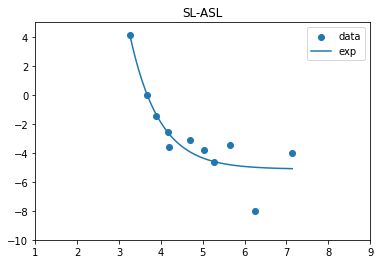

In [165]:
# 绘制拟合结果
x = np.linspace(min(x_data), max(x_data), 100)
plt.scatter(x_data, y_data, label='data')
plt.xlim(1, 9)
plt.ylim(-10, 5)
plt.plot(x, exponential_function(x, *popt1), label='exp')
# plt.plot(x, log_function(x, *popt2), label='log')
plt.title(name)
plt.legend()
plt.show()

In [166]:
def calculate_precision(function, popt):
    y_pred = np.zeros_like(x_data)
    for i in range(len(x_data)):
        y_pred[i] = function(x_data[i], *popt)
    rss = np.sum((y_data - y_pred) ** 2)
    rmse = np.sqrt(mean_squared_error(y_data, y_pred))
    r2 = r2_score(y_data, y_pred)
    return rss, rmse, r2


rss, rmse, r2 = calculate_precision(exponential_function, popt1)

print("RSS = %.2f" % rss)
print("RMSE = %.2f" % rmse)
print("R^2 = %.2f" % r2)

RSS = 13.91
RMSE = 1.12
R^2 = 0.85


In [167]:
columns = ['index', 'a1', 'b1', 'k1', 'm1', 'rss', 'rmse','r2']
columns_other = ['a1', 'b1', 'k1', 'm1', 'rss', 'rmse','r2']
result = pd.DataFrame(columns = columns)
result

,index,a1,b1,k1,m1,rss,rmse,r2


In [168]:
# y_data = np.array(data['ESL-SL'])
# y_data = np.array(data['SL-ASL'])
# y_data = np.array(data['PSL-SL'])
result['index']= ['ESL-SL', 'SL-ASL', 'PSL-SL']
result

,index,a1,b1,k1,m1,rss,rmse,r2
0,ESL-SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SL-ASL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PSL-SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
result.loc[2, columns_other] = [a1, b1, k1, m1, rss, rmse, r2]
result

,index,a1,b1,k1,m1,rss,rmse,r2
0,ESL-SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SL-ASL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PSL-SL,4.162689,3.930941,3.550362,-5.127523,13.913056,1.124644,0.847425


In [170]:
result.to_excel('1.xlsx')